In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [2]:
d=pd.read_csv(r'C:\Users\acer\Downloads\Wine.csv')

In [3]:
d.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
d.shape

(178, 13)

In [5]:
l=d.columns
l

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
d.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
d.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

[]

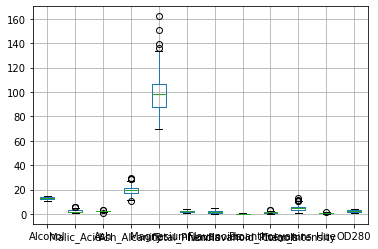

In [8]:
pt.subplots()
d.boxplot(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280',])
pt.plot()

<AxesSubplot:>

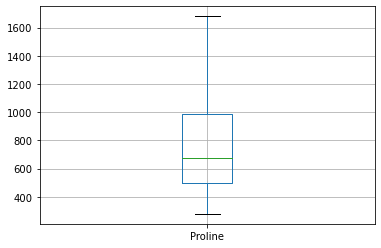

In [9]:
d[['Proline']].boxplot()

In [10]:
for column in d.columns[1:]:
    q1=d[column].quantile(0.25)
    q3=d[column].quantile(0.75)
    iqr=q3-q1
    l_l=q1-iqr*1.5
    u_l=q3+iqr*1.5
    d.loc[d[column]<l_l,column]=l_l
    d.loc[d[column]>u_l,column]=u_l

<AxesSubplot:>

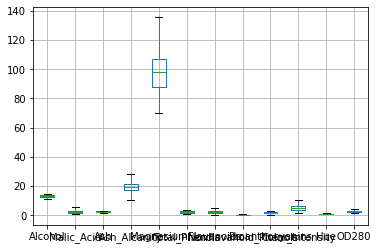

In [11]:
pt.subplots()
d.boxplot(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280',])

In [12]:
##scaling the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
d=scalar.fit_transform(d)
d=pd.DataFrame(d,columns=l)
d.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [13]:
## K Means clustering

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(d)
    wcss.append(km.inertia_)
    print(wcss)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2314.0]
[2314.0, 1654.906081350799]
[2314.0, 1654.906081350799, 1266.070346209317]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605, 1038.9752205548016]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605, 1038.9752205548016, 986.1928769323872]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605, 1038.9752205548016, 986.1928769323872, 948.5899235835216]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605, 1038.9752205548016, 986.1928769323872, 948.5899235835216, 908.9037567420924]
[2314.0, 1654.906081350799, 1266.070346209317, 1166.6555230515103, 1100.4433477257605, 1038.9752205548016, 986.1928769323872, 948.5899235835216, 908.9037567420924, 875.0793869435358]


[]

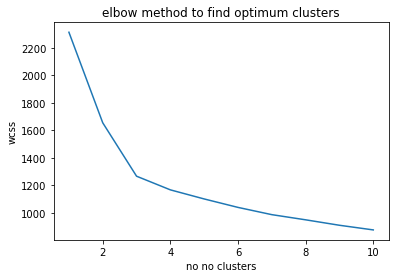

In [15]:
pt.plot(range(1,11),wcss)
pt.title('elbow method to find optimum clusters')
pt.xlabel('no no clusters')
pt.ylabel('wcss')
pt.plot()

In [16]:
## here optimum number of clusters is 3

In [17]:
km=KMeans(n_clusters=3,init='k-means++',random_state=42)
labels=km.fit_predict(d)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
## Agglomerative hierarchical clustering

Text(0.5, 1.0, 'dendrogram')

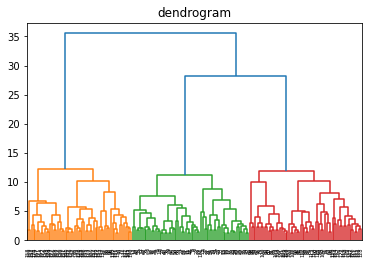

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(d,method='ward'))
pt.title('dendrogram')

In [20]:
#3 here optimum number of clusters is 5

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
lab=hc.fit_predict(d)
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 4, 2, 2, 2,
       0, 4, 1, 4, 1, 2, 2, 0, 2, 4, 4, 1, 4, 2, 4, 4, 2, 1, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 3], dtype=int64)

In [22]:
## Principle Componenet Analysis

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(d)
x_pca = pca.transform(d)
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

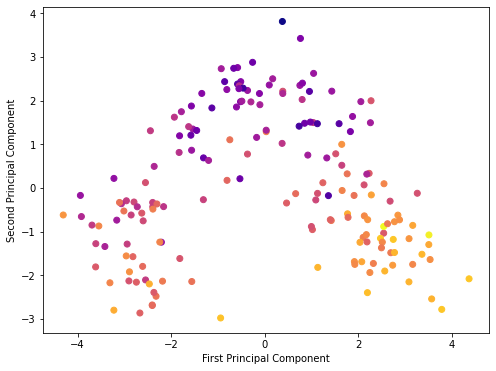

In [24]:
# plotting the PCA components
pt.figure(figsize =(8, 6))
pt.scatter(x_pca[:, 0], x_pca[:, 1], c = d['Alcohol'], cmap ='plasma')
pt.xlabel('First Principal Component')
pt.ylabel('Second Principal Component')

In [25]:
# displaying the PCA components
pca.components_

array([[ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
         0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
         0.29661931,  0.37445501,  0.28670932],
       [-0.47640599, -0.22659937, -0.31870602,  0.01442372, -0.32548413,
        -0.05970156,  0.00642568, -0.02645156, -0.03046924, -0.52512375,
         0.2734417 ,  0.16621634, -0.36136098]])